<a href="https://colab.research.google.com/github/roggersanguzu/ML-Datageddon/blob/main/Medical_Expenditure_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import matplotlib as matplotlib
import seaborn as sns
import plotly.express as px
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
url = "https://raw.githubusercontent.com/roggersanguzu/Machine-Learning-with-R-datasets/master/insurance.csv"
medicdata = pd.read_csv(url)

In [3]:
medicdata

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
medicdata.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [5]:
medicdata.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
medicdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


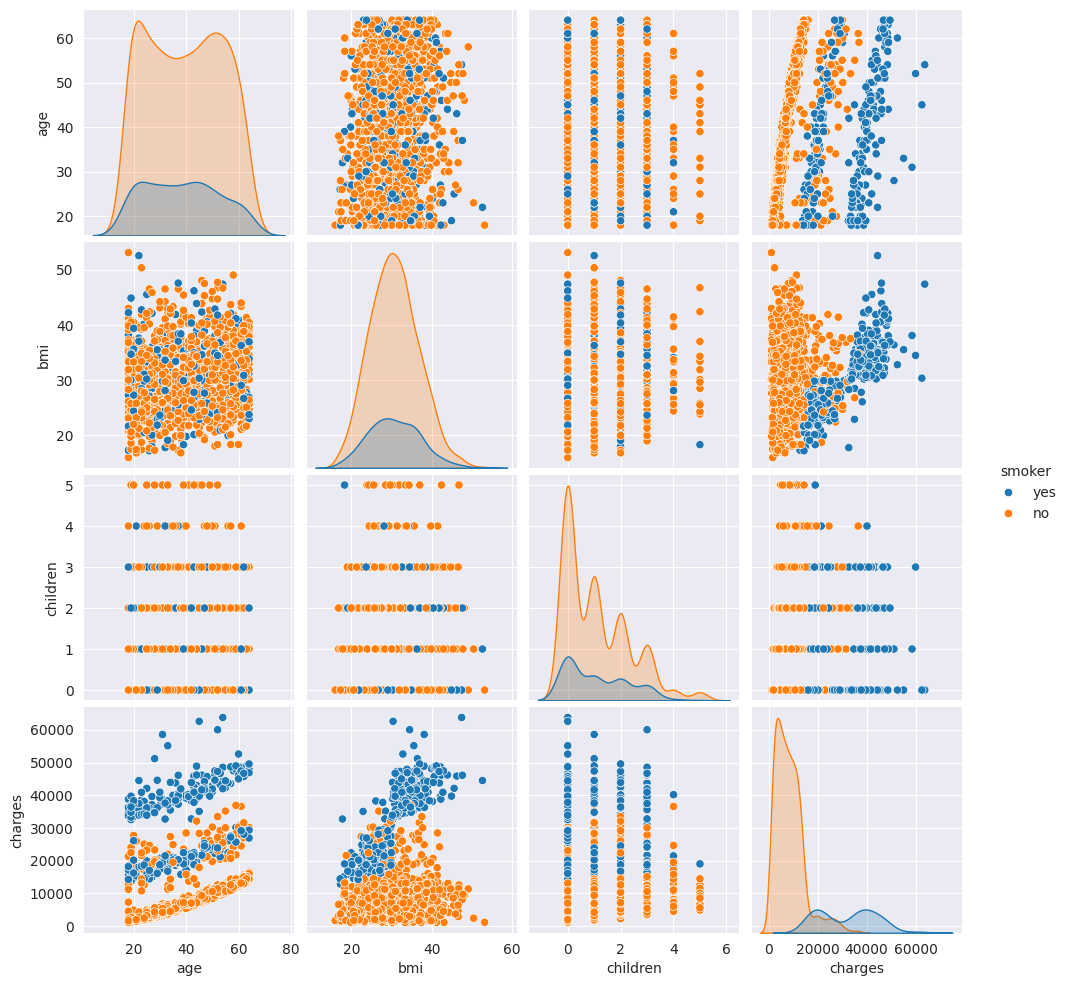

In [7]:
sns.set_style("darkgrid")
sns.pairplot(medicdata,hue='smoker')

In [9]:
sns.set_style("darkgrid")
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.figsize']=(9,5)

In [8]:
fig=px.histogram(medicdata,x='age',title='Age Distribution',marginal='box',nbins=47)
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig=px.histogram(medicdata,x='bmi',title='BMI Distribution',color_discrete_sequence=['Red'],marginal='box')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig=px.histogram(medicdata,x='charges',color='smoker',title='Annual Medical Charges',color_discrete_sequence=['Red','Green'],marginal='box')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig=px.histogram(medicdata,x='charges',color='sex',title='Annual Medical Charges',color_discrete_sequence=['Red','Green'],marginal='box')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig=px.histogram(medicdata,x='charges',color='region',title='Annual Medical Charges',color_discrete_sequence=['Red','Green','Blue','Yellow'],marginal='box')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig=px.histogram(medicdata,x='smoker',color='sex',title='Annual Medical Charges',color_discrete_sequence=['Red','Green'],marginal='box')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
medicdata.smoker.value_counts()

,count
smoker,
no,1064
yes,274


In [ ]:
fig=px.histogram(medicdata,x='children',color='smoker',title='Annual Medical Charges',color_discrete_sequence=['Red','Green'],marginal='box')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig=px.scatter(medicdata,x='age',y='charges',color='smoker',hover_data=['sex'],title='Age vs Charges')
fig.update_traces(marker_size=5)
fig.show()

In [ ]:
fig=px.scatter(medicdata,x='bmi',y='charges',color='smoker',hover_data=['sex',],title='BMI vs Charges')
fig.update_traces(marker_size=5)
fig.show()

In [ ]:
fig=px.violin(medicdata,x='children',y='charges',title='Children vs Charges')
fig.show()

In [10]:
medicdata.charges.corr(medicdata.age)

np.float64(0.2990081933306476)

In [11]:
medicdata.charges.corr(medicdata.bmi)

np.float64(0.19834096883362895)

In [31]:
a=medicdata.copy()
b=medicdata.copy()
c=medicdata.copy()
d=medicdata.copy()

In [32]:
a['smoker'] = a['smoker'].str.strip().str.lower()
a['smoker'] = a['smoker'].map({'yes': 1, 'no': 0})
a

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,0,northwest,10600.54830
1334,18,female,31.920,0,0,northeast,2205.98080
1335,18,female,36.850,0,0,southeast,1629.83350
1336,21,female,25.800,0,0,southwest,2007.94500


In [22]:
px.scatter(medicdata,x='age',y='charges')

In [50]:
nonsmoker=a[a.smoker==0]
smokerer=a[a.smoker==1]
nonsmoker

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520
5,31,female,25.740,0,0,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,0,southwest,11411.68500
1333,50,male,30.970,3,0,northwest,10600.54830
1334,18,female,31.920,0,0,northeast,2205.98080
1335,18,female,36.850,0,0,southeast,1629.83350


In [36]:
smokerer

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
11,62,female,26.290,0,1,southeast,27808.72510
14,27,male,42.130,0,1,southeast,39611.75770
19,30,male,35.300,0,1,southwest,36837.46700
23,34,female,31.920,1,1,northeast,37701.87680
...,...,...,...,...,...,...,...
1313,19,female,34.700,2,1,southwest,36397.57600
1314,30,female,23.655,3,1,northwest,18765.87545
1321,62,male,26.695,0,1,northeast,28101.33305
1323,42,female,40.370,2,1,southeast,43896.37630


In [39]:
a['charges'].corr(a['smoker'])

np.float64(0.787251430498478)

In [44]:
a_numeric = a.select_dtypes(include='number')
print(a_numeric.corr())

               age       bmi  children    smoker   charges
age       1.000000  0.109272  0.042469 -0.025019  0.299008
bmi       0.109272  1.000000  0.012759  0.003750  0.198341
children  0.042469  0.012759  1.000000  0.007673  0.067998
smoker   -0.025019  0.003750  0.007673  1.000000  0.787251
charges   0.299008  0.198341  0.067998  0.787251  1.000000


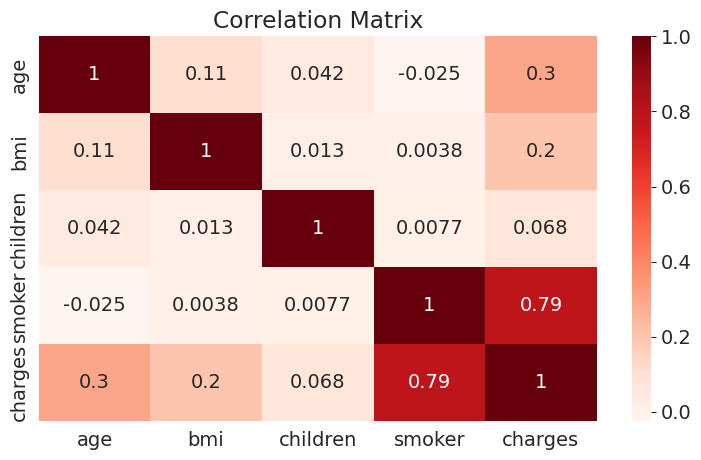

In [49]:
corr_matrix = a.select_dtypes(include='number').corr()

sns.heatmap(corr_matrix, cmap='Reds', annot=True)
plt.title('Correlation Matrix')
plt.show()

<Axes: title={'center': 'Age Vs Charges'}, xlabel='age', ylabel='charges'>

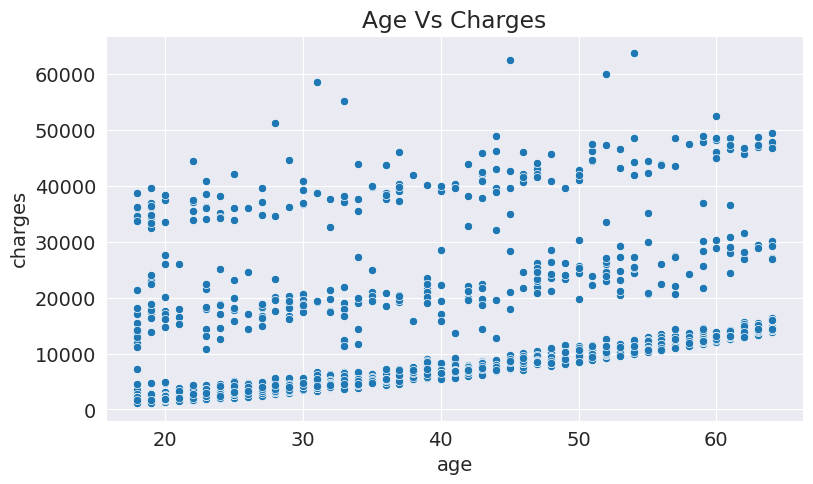

In [60]:
plt.title('Age Vs Charges')
sns.scatterplot(a,x='age',y='charges')

In [67]:
def estimate(age,m,c):
  return m*age + c

In [82]:
m=50
c=100
estimate(40,m,c)

2100

In [71]:
ages=nonsmoker.age
ages

,age
1,18
2,28
3,33
4,32
5,31
...,...
1332,52
1333,50
1334,18
1335,18


In [72]:
estimated_charges = estimate(ages,m,c)
estimated_charges

,age
1,1000
2,1500
3,1750
4,1700
5,1650
...,...
1332,2700
1333,2600
1334,1000
1335,1000


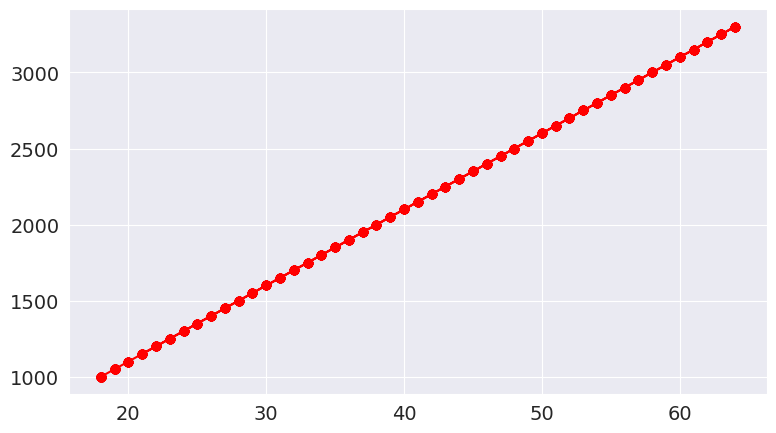

In [80]:
plt.plot(ages,estimated_charges,'r-o')
plt.xlabel=('age')
plt.ylabel=('charges')

In [83]:
nonsmoker.charges

,charges
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
5,3756.62160
...,...
1332,11411.68500
1333,10600.54830
1334,2205.98080
1335,1629.83350


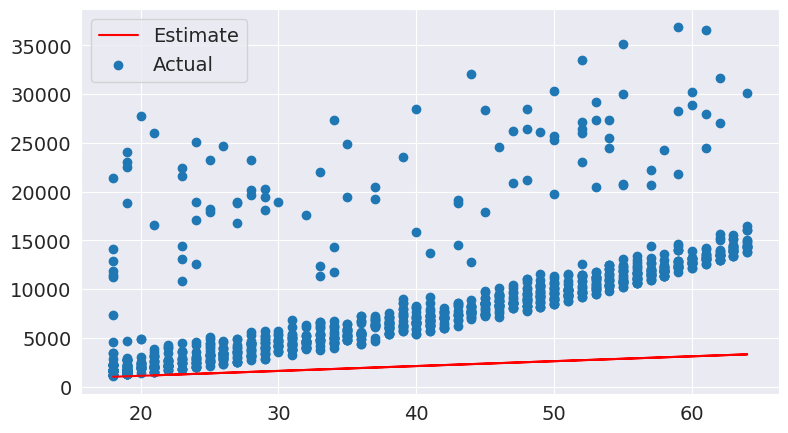

In [91]:
target=nonsmoker.charges

plt.plot(ages,estimated_charges,'r')
plt.scatter(x=ages,y=target)
plt.xlabel=('age')
plt.ylabel=('charges')
plt.legend(['Estimate','Actual'])